## About the dataset

Ref 1: [Customer Segmentation Dataset](https://www.kaggle.com/datasets/yasserh/customer-segmentation-dataset)

Ref 2: [Online Retail](https://archive.ics.uci.edu/dataset/352/online+retail)


This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.


### Variables 
```
- InvoiceNo: a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation
- StockCode: a 5-digit integral number uniquely assigned to each distinct product
- Description: product name
- Quantity: the quantities of each product (item) per transaction
- InvoiceDate: the day and time when each transaction was generated
- UnitPrice: product price per unit
- CustomerID: a 5-digit integral number uniquely assigned to each customer
- Country: the name of the country where each customer resides
```


## Code

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import os
from tqdm import tqdm
import time

### Read and Preprocessing Data

In [2]:
current_path = os.getcwd()
data_path = os.path.join(current_path, '../data')

file = os.path.join(data_path,'clientes.xlsx')

df_clients = pd.read_excel(file)

In [3]:
# backup df
df_save = df_clients.copy()

In [4]:
df_clients.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df_clients.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [6]:
# verify NaN values
df_clients.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# clean NaN values
df_clients = df_clients.dropna()
df_clients.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df_clients

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [9]:
# Normalize data
scaler = StandardScaler()

X = scaler.fit_transform(df_clients[['Quantity', 'UnitPrice']])

### Finding the optimal number of clusters (k)

In [10]:
# sil_scores = []
# range_n_clusters = list(range(2, 11))

# for k in tqdm(range_n_clusters, desc='Finding number of clusters'):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     labels = kmeans.fit_predict(X)
#     score = silhouette_score(X, labels)
#     sil_scores.append(score)

# # Plot
# plt.plot(range_n_clusters, sil_scores, marker='o')
# plt.xlabel("Número de Clusters (k)")
# plt.ylabel("Silhouette Score")
# plt.title("Escolha do melhor k")
# plt.savefig('bestChoice.png', dpi=300)
# # plt.show()

# melhor_k = range_n_clusters[np.argmax(sil_scores)]
# print("Melhor número de clusters:", melhor_k)

### Apply the KMeans model with best k

In [11]:
melhor_k = 4

start = time.time()
kmeans = KMeans(n_clusters=melhor_k, random_state=42)
end_1 = time.time()
df_clients['cluster'] = kmeans.fit_predict(X)
end_2 = time.time()

print(f'First {end_1 - start:.2f} seconds')
print(f'Second {end_2 - end_1:.2f} seconds')


First 0.00 seconds
Second 0.14 seconds


### Cluster analysis and visualization

         Quantity  UnitPrice
cluster                     
0           12.06       3.36
1           -1.00   38970.00
2        77605.00       1.56
3       -77605.00       1.56


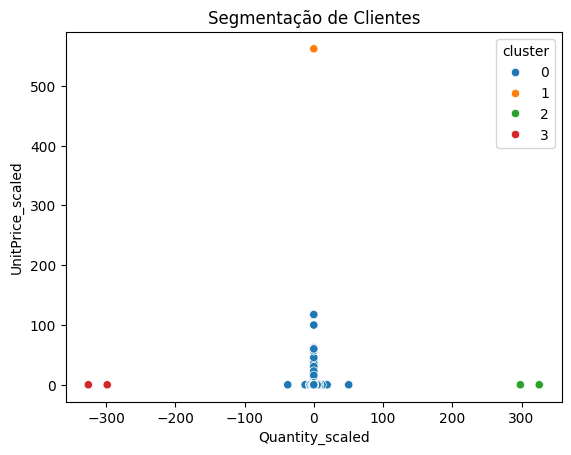

In [13]:
# Desnormalizar se necessário para interpretação
X_df = pd.DataFrame(X, columns=['Quantity_scaled', 'UnitPrice_scaled'])
df_clusters = pd.concat([X_df, df_clients['cluster'].reset_index(drop=True)], axis=1)

# Visualização em 2D com PCA ou apenas 2 variáveis principais
sns.scatterplot(data=df_clusters, x='Quantity_scaled', y='UnitPrice_scaled', hue='cluster', palette='tab10')
plt.title("Segmentação de Clientes")
# plt.show()
plt.savefig('customerSegmentation.png', dpi=300)

# Estatísticas por cluster
personas = df_clients.groupby('cluster')[['Quantity', 'UnitPrice']].mean().round(2)
print(personas)


### Definition of Personas